<a href="https://colab.research.google.com/github/GustasAndre/Campanha_MKT/blob/main/desafio_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio: Construindo um modelo de Regressão para marketing


In [1]:
#Importar as bibliotecas necessárias para o case
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#Importar dados CSV.
mkt = pd.read_csv("/content/drive/MyDrive/MKT.csv")
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
# Criar a coluna 'Total_de_anuncios' somando as colunas 'youtube', 'facebook' e 'newspaper'
mkt['Total_de_anuncios'] = mkt[['youtube', 'facebook', 'newspaper']].sum(axis=1)

# Reorganizar as colunas
mkt = mkt[['youtube', 'facebook', 'newspaper', 'Total_de_anuncios', 'sales']]

# Calcular a porcentagem de vendas em relação ao total de anúncios e arredondar para duas casas decimais
mkt['%_de_vendas'] = ((mkt['sales'] / mkt['Total_de_anuncios']) * 100).round(2)

mkt.head()

<ipython-input-4-8287caf91570>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt['%_de_vendas'] = ((mkt['sales'] / mkt['Total_de_anuncios']) * 100).round(2)


,youtube,facebook,newspaper,Total_de_anuncios,sales,%_de_vendas
0,84.72,19.20,48.96,152.88,12.60,8.24
1,351.48,33.96,51.84,437.28,25.68,5.87
2,135.48,20.88,46.32,202.68,14.28,7.05
3,116.64,1.80,36.00,154.44,11.52,7.46
4,318.72,24.00,0.36,343.08,20.88,6.09


Como podem observar acima, foi adicionado duas colunas para podermos verificar a relação entre o valor total de investimento e a porcentagem de vendas relacionado a campanha investida.

In [5]:
#informações sobre os dados (tipo de dados). Verificando se precisa tratar os dados.
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   youtube            171 non-null    float64
 1   facebook           171 non-null    float64
 2   newspaper          171 non-null    float64
 3   Total_de_anuncios  171 non-null    float64
 4   sales              171 non-null    float64
 5   %_de_vendas        171 non-null    float64
dtypes: float64(6)
memory usage: 8.1 KB


In [6]:
#função para descrever: contagem, mínimo, máximo, desvio padrão e média.
mkt.describe()

,youtube,facebook,newspaper,Total_de_anuncios,sales,%_de_vendas
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,240.932632,16.922807,7.807895
std,102.449597,17.913532,24.902918,112.167551,6.314608,2.364687
min,0.840000,0.000000,0.360000,25.680000,1.920000,3.270000
25%,91.080000,11.700000,13.740000,146.820000,12.540000,6.445000
50%,179.760000,26.760000,31.080000,248.400000,15.480000,7.370000
75%,262.980000,43.680000,50.880000,337.740000,20.820000,8.960000
max,355.680000,59.520000,121.080000,520.320000,32.400000,16.300000


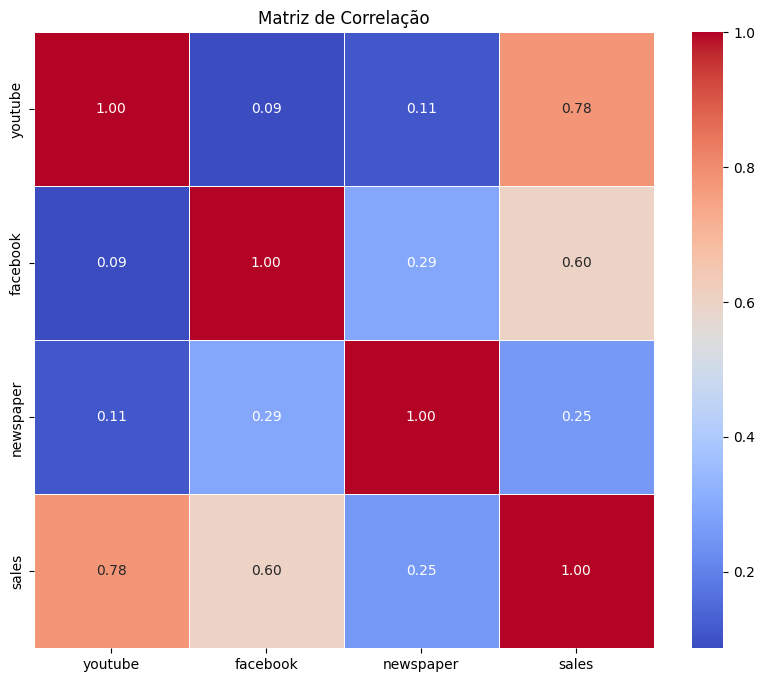

In [7]:
# Selecionar apenas as colunas desejadas
mkt_novo = mkt[['youtube', 'facebook', 'newspaper', 'sales']]

# Calcular a matriz de correlação
correlation_matrix = mkt_novo.corr()

# Plotar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Vendo o modelo de correlação entre as plataformas de investimentos e a quantidade vendida, pode se observar que youtube e facebook apresentam uma correlação muito grande com o retorno de vendas, sendo que o primeiro tem 0.7 em uma escala de -1 até 1, onde 1 é o nível máximo positivo e -1 o mínimo, e o segundo de 0.69 nesta mesma escala.

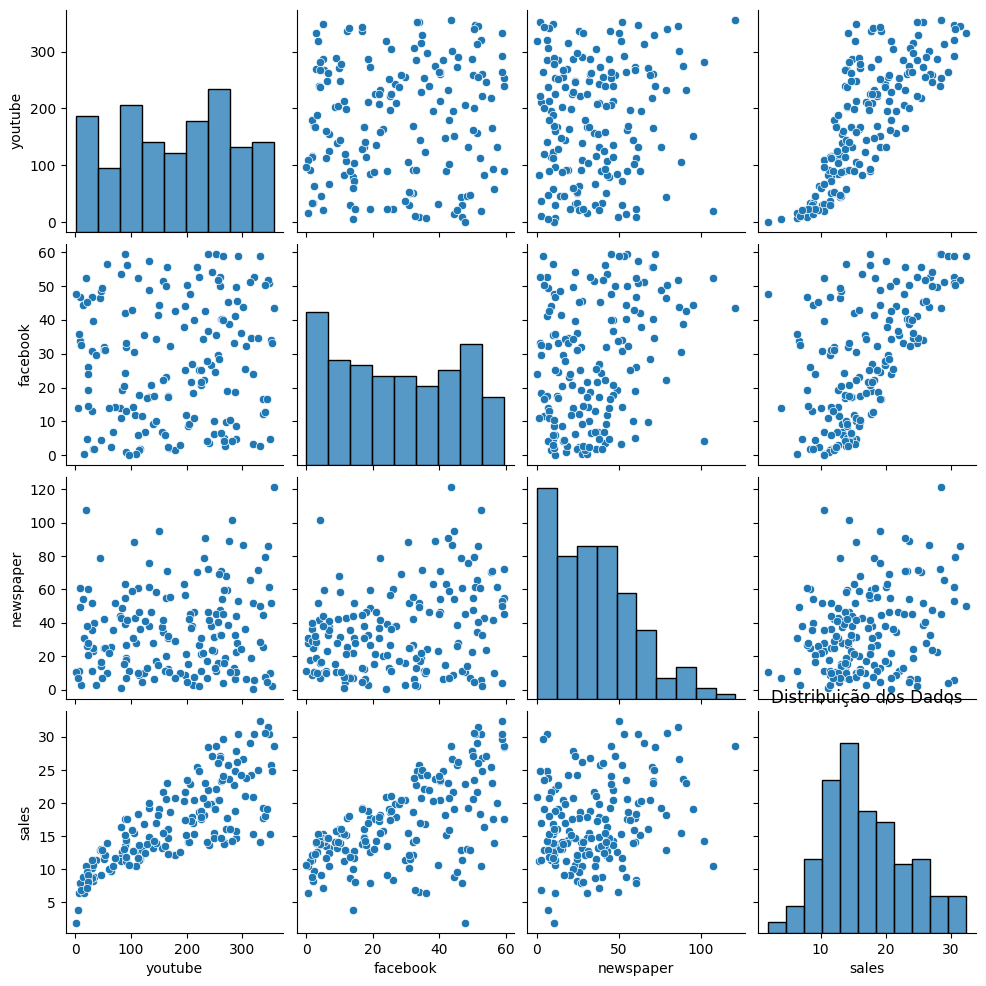

In [8]:
# Plotar a distribuição dos dados usando um pairplot
sns.pairplot(mkt_novo)
plt.title('Distribuição dos Dados')
plt.show()

Como podemos observar através do modelo de distribuição, o youtube se mostra mais uma vez sendo a ferramenta mais eficiente nos anuncios, pois como podem observear não há tanta dispersão dos dados, ou seja, quanto mais aproximado maior é a relação dos mesmos.

In [9]:
#selecionar as features(X) e a target(y):
X = mkt[['youtube','facebook','newspaper']]
y = mkt[['sales']]

#treinar e testar as features e a target:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#criar modelo de regressão linear:
model = LinearRegression()

#treinar modelo:
model.fit(X_train, y_train)

#fazer previsões nos dados de teste:
predictions = model.predict(X_test)

#Avaliar o desempenho do modelo:
mse = mean_squared_error(y_test, predictions).round(4)
print("MSE: ", mse)

# Calcular o coeficiente de determinação (R^2) nos dados de teste
r2_score = model.score(X_test, y_test).round(4)
print("Coeficiente de determinação (R^2):", r2_score)

MSE:  5.5768
Coeficiente de determinação (R^2): 0.8729


In [10]:
# Fazer previsões de vendas com base nos investimentos em marketing
vendas_previstas = model.predict(X_test).round(2)

# Visualizar as vendas previstas
print("Vendas previstas:")
print(vendas_previstas)

Vendas previstas:
[[12.98]
 [25.06]
 [18.24]
 [20.63]
 [11.59]
 [ 8.56]
 [13.35]
 [23.17]
 [12.03]
 [24.96]
 [10.23]
 [13.43]
 [13.98]
 [11.03]
 [20.76]
 [26.45]
 [28.93]
 [21.76]
 [21.25]
 [24.16]
 [20.68]
 [ 9.84]
 [19.43]
 [18.24]
 [14.29]
 [26.11]
 [20.88]
 [10.58]
 [12.22]
 [23.14]
 [ 7.01]
 [ 8.46]
 [16.6 ]
 [21.84]
 [18.14]]
